In [1]:
import random
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D

In [2]:
OUTPUT_IMAGES_LOCATION = Path("output_images") / "attack_convergence"
if not OUTPUT_IMAGES_LOCATION.exists():
    OUTPUT_IMAGES_LOCATION.mkdir(parents=True)

In [3]:
sns.set_theme(style="darkgrid")
mpl.rcParams['text.usetex'] = True

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize": (3.14, 3.14 / 1.6),
            "legend.fontsize": 12,
            "legend.title_fontsize": 14},
        font_scale=1.5)

In [4]:
random.seed(42)

In [5]:
def read_file(filename):
    return pd.read_csv(filename).rename(columns={"loss": "Loss", "steps": "Attack steps"})

def plot_point(filename, index):
    results = read_file(filename)
    single_point_df = results[results["point"] == index].drop(["point"], axis=1)
    sns.lineplot(data=single_point_df, x="Attack steps", y="Loss", hue="seed", legend=False, linewidth=1.5)
    pdf_filename = f"{Path(filename).stem}-point.pdf"
    plt.savefig(OUTPUT_IMAGES_LOCATION / pdf_filename, bbox_inches="tight")
    

def plot_point_from_files(filenames, model_names, index):
    results = []
    for filename, model_name in zip(filenames, model_names):
        model_results = read_file(filename)
        model_results["Model"] = model_name
        results.append(model_results)
    results = pd.concat(results).reset_index()
    single_point_results = results[results["point"] == index].drop(["point"], axis=1)
    ax = sns.lineplot(data=single_point_results,
                      x="Attack steps", y="Loss",
                      hue="seed", style="Model",
                      linewidth=1.5, err_style="bars",
                      markers=True)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[-3:], labels[-3:])
    pdf_filename = f"{'_'.join(model_names)}.pdf"
    plt.savefig(OUTPUT_IMAGES_LOCATION / pdf_filename, bbox_inches="tight")
    

def plot_all_points(filename):
    results = read_file(filename)
    g = sns.FacetGrid(
        results,
        col="point",
        hue="seed",
        col_wrap=4,
        height=4,
        sharey=False
    )
    g.map(sns.lineplot, "Attack steps", "Loss", ci=None)
    g.set_titles(col_template="")
    pdf_filename = f"{Path(filename).stem}-all.pdf"
    plt.savefig(OUTPUT_IMAGES_LOCATION / pdf_filename, bbox_inches="tight")
    

def get_random_index(filenames):
    assert len(filenames) > 0
    all_ids_sets = []
    for filename in filenames:
        ids = read_file(filename)["point"]
        all_ids_sets.append(set(ids))
    valid_ids = all_ids_sets[0]
    for ids_set in all_ids_sets[1:]:
        valid_ids = valid_ids.intersection(ids_set)
    return random.choice(list(valid_ids))


plot_random_point = lambda filename: plot_point(filename, get_random_index([filename]))

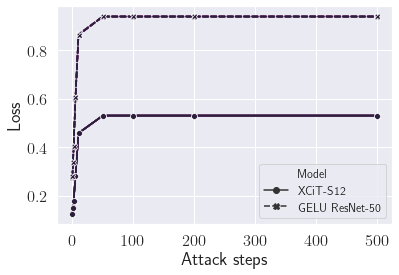

In [6]:
filenames = ["data/attack_convergence/xcit-robust-99.csv", "data/attack_convergence/resnet-robust-99.csv"]
plot_point_from_files(filenames, ["XCiT-S12", "GELU ResNet-50"], get_random_index(filenames))

## XCiT

### Final model results

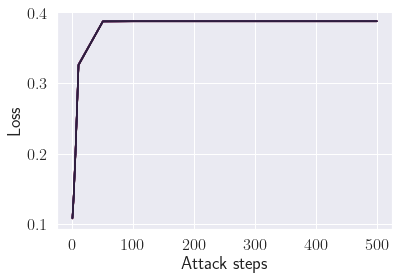

In [7]:
plot_random_point("data/attack_convergence/xcit-robust-99.csv")

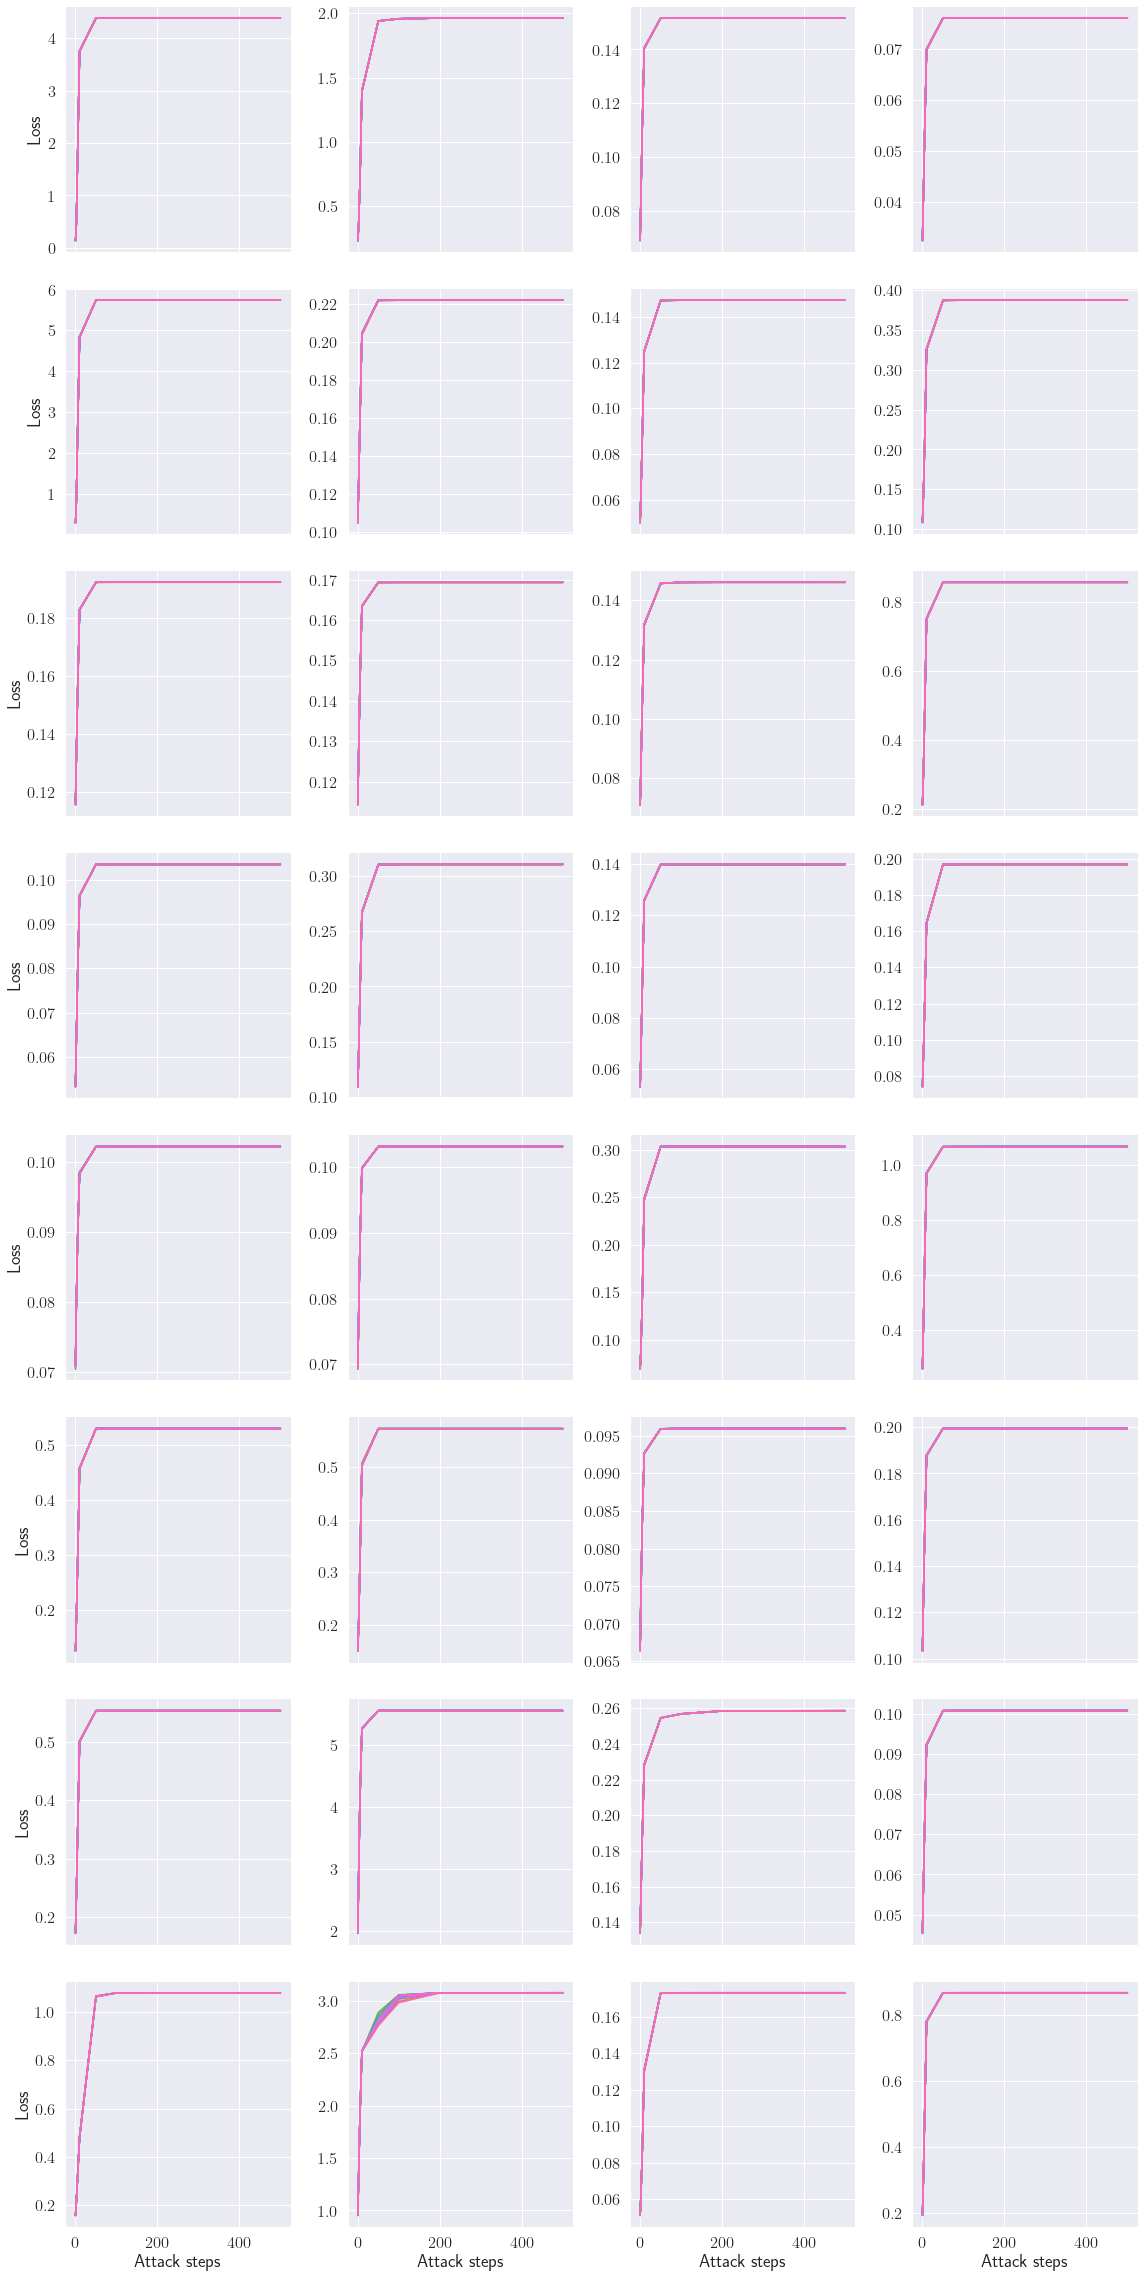

In [8]:
plot_all_points("data/attack_convergence/xcit-robust-99.csv")

## ResNet

### Final model results

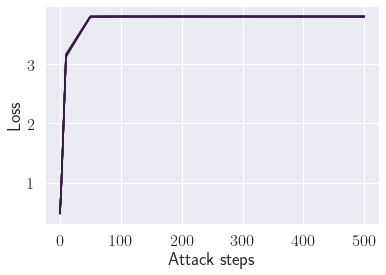

In [9]:
plot_random_point("data/attack_convergence/resnet-robust-99.csv")

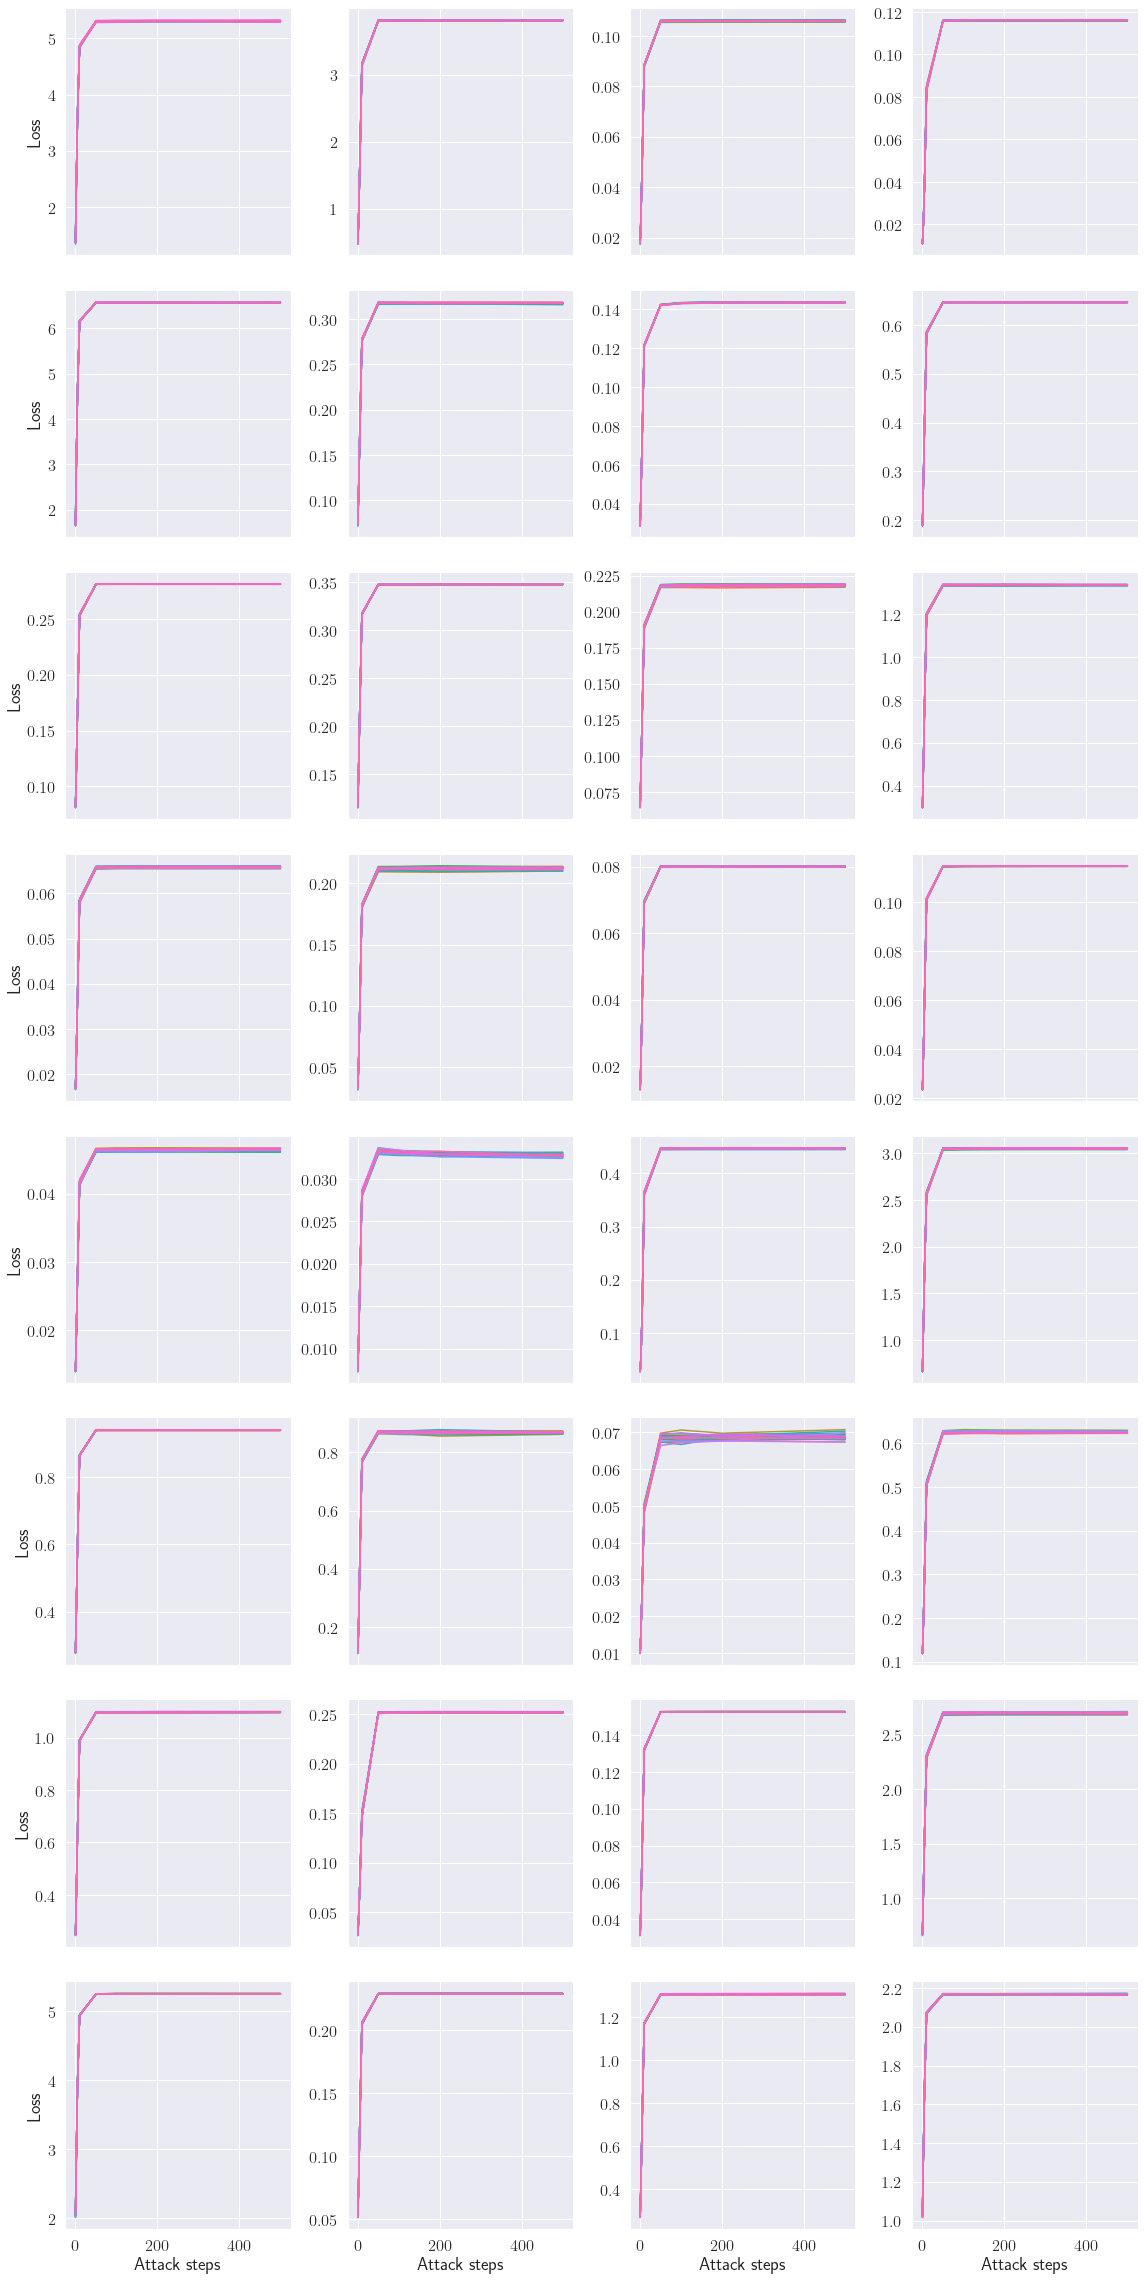

In [10]:
plot_all_points("data/attack_convergence/resnet-robust-99.csv")